# Electric Field


<dt> Definition of electric field </dt>
<di>
$\vec{F_2} = q_2 \vec{E_1}$
</di>


<dt> Electric Field of a point charge </dt>
<di>
$\vec{E_1} = \frac{1}{4 \pi \epsilon_0} \frac{q_1}{|{\vec{r}|^2}}\hat{r}$
</di>


In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

lets suppose there is a point charge, a proton at some location. Say let's put it at $loc_{xyz} =<1,2,3>$. A proton has a charge [$q = 1.6021766208(98)\times10^{−19} C$](https://en.wikipedia.org/wiki/Proton). Which for the sake of this is an obscene level of precision. Let's just say our proton has $q = 1.602 \times 10^{-19}C$

In [2]:
loc_p = np.array((0,0,0))
q_p = 1.602e-19

eps_0 = 8.85e-12
charge_const = 1 / (4 * np.pi * eps_0)

Now what is the electric field for a series of points in a small radius, say over 0.2 m?

In [177]:
x0,x1 = np.array((-1,1)) * 1e-3
y0,y1 = np.array((-1,1)) * 1e-3

X, Y = np.meshgrid(np.linspace(x0,x1, 100), 
                   np.linspace(y0,y1,100))

# ignore values smaller than two radii
#X[(X < 2e-4) & (X > -2e-4) & (Y < 2e-4) & (Y > -2e-4)] = np.nan
#Y[(X < 2e-4) & (X > -2e-4) & (Y < 2e-4) & (Y > -2e-4)] = np.nan

def E_field(r, q):
    return (charge_const * q * vec_dir(r)) / vec_mag(r) 

def vec_mag(vector):
    return np.sum(vector**2)

def vec_dir(vector):
    return vector / vec_mag(vector)

In [214]:
E_F_p = np.array([E_field(np.array((x,y, 0) - loc_p), q_p) 
                     for xx,yy in zip(X,Y)
                        for x, y in zip(xx,yy)])

E_F_q = np.array([E_field(np.array((x,y, 0)) - ([.25e-3, 0, 0]), -q_p) 
                     for xx,yy in zip(X,Y)
                        for x, y in zip(xx,yy)])

E_F = E_F_p + E_F_q



R = [vec_mag(np.array((x,y,0) - loc_p)) 
                     for xx,yy in zip(X,Y)
                        for x, y in zip(xx,yy)]

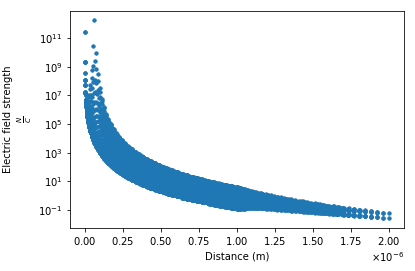

In [215]:
import matplotlib.ticker as mtick

plt.scatter(R, [vec_mag(e_f) for e_f in E_F], '.')

plt.ylabel('Electric field strength\n'r'$\frac{N}{C}$')
plt.xlabel('Distance (m)')
plt.gca().set_yscale('log')
#plt.gca().set_xscale('log')


ax = plt.gca()
#this way change the ticks formats
import math
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("$10^{%d}$" % math.log(v,10)) ))

#maybe this is what you want
ax.xaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))

ax.get_xaxis().get_major_formatter().set_powerlimits([1,1])

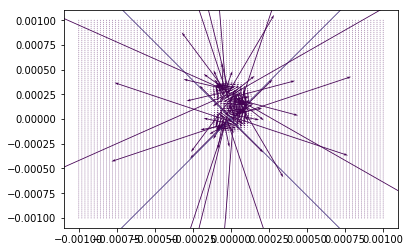

In [216]:
U, V, W = E_F.reshape(100,100,3).T

mag_ef = np.array([vec_mag(e_f) for e_f in E_F]).reshape(100,100)

Q = plt.quiver(X, Y, U, V, mag_ef)

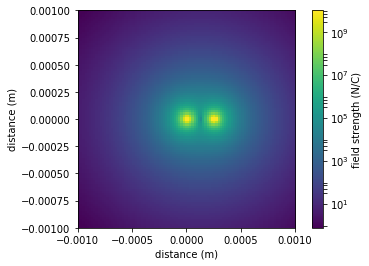

In [213]:
plt.imshow(mag_ef, vmax = 1e10,
           norm = mpl.colors.LogNorm(),
          extent= [x0,x1, y0,y1]
          )


plt.colorbar(label = 'field strength (N/C)');
plt.xlabel('distance (m)')
plt.ylabel('distance (m)')

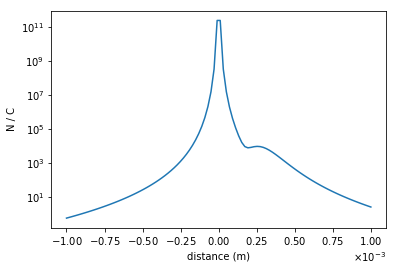

In [209]:
plt.plot(
    np.linspace(x0,x1, 100),
    mag_ef[np.arange(100),np.arange(100)])

ax = plt.gca()
ax.set_yscale('log')
ax.set_ylabel('N / C')
ax.set_xlabel('distance (m)')

#this way change the ticks formats
import math
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("$10^{%d}$" % math.log(v,10)) ))

#maybe this is what you want
ax.xaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))

ax.get_xaxis().get_major_formatter().set_powerlimits([1,1])

In [183]:
E_F

array([[ -3.60121778e-01,  -3.60121778e-01,   2.00064987e-17],
       [ -3.67393920e-01,  -3.74969053e-01,   2.00065014e-17],
       [ -3.74647171e-01,  -3.90421789e-01,   2.00065041e-17],
       ..., 
       [  3.74647171e-01,   3.90421789e-01,   2.00070268e-17],
       [  3.67393920e-01,   3.74969053e-01,   2.00070295e-17],
       [  3.60121778e-01,   3.60121778e-01,   2.00070322e-17]])